In [0]:
from pyspark import SQLContext
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.image import ImageSchema

from pyspark.sql.functions import udf
from pyspark.sql.functions import input_file_name
from pyspark.sql.types import *

In [0]:
def preprocess_data(dataframe):
    '''Renvoie le résultat de l'avant dernière couche de chaque image du dataframe via transform du ResNet50
    return un df contenant des vecteurs de dimension 1x2048 '''
    
    from sparkdl import DeepImageFeaturizer
    # DeepImageFeaturizer Applies the model specified by its popular name, 
    # with its prediction layer(s) chopped off
    featurizer = DeepImageFeaturizer(inputCol="image",outputCol="image_preprocessed", modelName="ResNet50")
    output = featurizer.transform(dataframe).select(['path', 'categorie', 'image_preprocessed'])
    del featurizer
    return output

In [0]:
# check the contents in tables folder
display(dbutils.fs.ls("/FileStore/tables"))

path,name,size,modificationTime
dbfs:/FileStore/tables/AHAMEG_accessKeys.csv,AHAMEG_accessKeys.csv,96,1658914080000


In [0]:
# pyspark functions
from pyspark.sql.functions import *

# URL processing "Package de gestion des url"
import urllib

###### Lecture du fichier csv contenant les clés AWS databricks.
Nous spécifions que le type de fichier => "csv".

Nous indiquons que le fichier a la première ligne comme en-tête et une virgule comme délimiteur. 

Le chemin du fichier "csv" a été transmis pour charger le fichier.

In [0]:
# Define file type
file_type ="csv"

# Whether the file has a header 
first_row_is_header = "true"

# Delimiter used in the file 
delimiter =","

# Read the csv file to spark dataframe 
aws_keys_df = spark.read.format(file_type)\
.option("header", first_row_is_header)\
.option("sep", delimiter)\
.load("/FileStore/tables/AHAMEG_accessKeys.csv")

###### Obtenez la clé d'accès et la clé secrète à partir de la trame de données Spark. 

=> La clé secrète a été encodée à l'aide de urllib.parse.quote à des fins de sécurité. 

=> safe="" signifie que chaque caractère de la clé secrète est encodé.

In [0]:
# Get the AWS access key and secret key from the spark dataframe 
ACCESS_KEY = aws_keys_df.select('Access key ID').collect()[0]['Access key ID'] # where(col('AHAMEG')=='AHAMEG_accessKeys')
SECRET_KEY = aws_keys_df.select('Secret access key').collect()[0]['Secret access key'] # where(col('AHAMEG')=='AHAMEG_accessKeys').

# Encode the secrete key
ENCODED_SECRET_KEY = urllib.parse.quote(string=SECRET_KEY, safe="")

### Connexion de AWS_S3 à Databricks

In [0]:
# AWS s3 bucket name
AWS_S3_BUCKET = "db-ab98764274fceb6cdf2ec80674550417-s3-root-bucket"

# Mount name for the bucket
MOUNT_NAME = "/mnt/db-ab98764274fceb6cdf2ec80674550417-s3-root-bucket"

# Source url
SOURCE_URL = f"s3n://{ACCESS_KEY}:{ENCODED_SECRET_KEY}@{AWS_S3_BUCKET}"

## Mount the drive
#dbutils.fs.mount(SOURCE_URL, MOUNT_NAME)

#### Vérification du contenu du compartiment AWS_S3

In [0]:
display(dbutils.fs.ls("/mnt/db-ab98764274fceb6cdf2ec80674550417-s3-root-bucket/ireland-prod/649518621194849/tmp/Photos/"))

path,name,size,modificationTime
dbfs:/mnt/db-ab98764274fceb6cdf2ec80674550417-s3-root-bucket/ireland-prod/649518621194849/tmp/Photos/apple_6/,apple_6/,0,1659452520472
dbfs:/mnt/db-ab98764274fceb6cdf2ec80674550417-s3-root-bucket/ireland-prod/649518621194849/tmp/Photos/apple_braeburn_1/,apple_braeburn_1/,0,1659452520472
dbfs:/mnt/db-ab98764274fceb6cdf2ec80674550417-s3-root-bucket/ireland-prod/649518621194849/tmp/Photos/apple_crimson_snow_1/,apple_crimson_snow_1/,0,1659452520472
dbfs:/mnt/db-ab98764274fceb6cdf2ec80674550417-s3-root-bucket/ireland-prod/649518621194849/tmp/Photos/apple_golden_1/,apple_golden_1/,0,1659452520472
dbfs:/mnt/db-ab98764274fceb6cdf2ec80674550417-s3-root-bucket/ireland-prod/649518621194849/tmp/Photos/apple_golden_2/,apple_golden_2/,0,1659452520472
dbfs:/mnt/db-ab98764274fceb6cdf2ec80674550417-s3-root-bucket/ireland-prod/649518621194849/tmp/Photos/apple_golden_3/,apple_golden_3/,0,1659452520472
dbfs:/mnt/db-ab98764274fceb6cdf2ec80674550417-s3-root-bucket/ireland-prod/649518621194849/tmp/Photos/apple_granny_smith_1/,apple_granny_smith_1/,0,1659452520473
dbfs:/mnt/db-ab98764274fceb6cdf2ec80674550417-s3-root-bucket/ireland-prod/649518621194849/tmp/Photos/apple_hit_1/,apple_hit_1/,0,1659452520473
dbfs:/mnt/db-ab98764274fceb6cdf2ec80674550417-s3-root-bucket/ireland-prod/649518621194849/tmp/Photos/apple_pink_lady_1/,apple_pink_lady_1/,0,1659452520473
dbfs:/mnt/db-ab98764274fceb6cdf2ec80674550417-s3-root-bucket/ireland-prod/649518621194849/tmp/Photos/apple_red_1/,apple_red_1/,0,1659452520473


In [0]:
import glob
import time
import io
import os
#import numpy as np
from PIL import Image

#### Lecture des données AWS_S3 à partir de Databricks. 
Affichage de la catégorie de chaque image et son chemin

In [0]:
# File location and type
path ="/mnt/db-ab98764274fceb6cdf2ec80674550417-s3-root-bucket/ireland-prod/649518621194849/tmp/Photos/*"
file_type ="image"

#compteur
start = time.time()

# Read data from S3 to DataBricks
df = spark.read.format(file_type).load(path)
print ('loading done')

# recover path from images
df = df.withColumn("path", input_file_name())

def parse_categorie(path):
    '''Renvoie la catégorie d\'une image à partir de son chemin'''
    if len(path) > 0:
        #catégorie de l'image
        return path.split('/')[-2]
    else:
        return ''

#image categorization
udf_categorie = udf(parse_categorie, StringType())
df = df.withColumn('categorie', udf_categorie('path'))
print('Temps de chargement des images : {} secondes'.format(time.strftime('%S', time.gmtime(time.time()-start))))
      
# Take a look at the data 
df.show()

loading done
Temps de chargement des images : 02 secondes
+--------------------+--------------------+--------------------+
 image| path| categorie|
+--------------------+--------------------+--------------------+
{dbfs:/mnt/db-ab9...|dbfs:/mnt/db-ab98...| cabbage_white_1|
{dbfs:/mnt/db-ab9...|dbfs:/mnt/db-ab98...| cabbage_white_1|
{dbfs:/mnt/db-ab9...|dbfs:/mnt/db-ab98...| cabbage_white_1|
{dbfs:/mnt/db-ab9...|dbfs:/mnt/db-ab98...| apple_hit_1|
{dbfs:/mnt/db-ab9...|dbfs:/mnt/db-ab98...| apple_hit_1|
{dbfs:/mnt/db-ab9...|dbfs:/mnt/db-ab98...| apple_hit_1|
{dbfs:/mnt/db-ab9...|dbfs:/mnt/db-ab98...| apple_hit_1|
{dbfs:/mnt/db-ab9...|dbfs:/mnt/db-ab98...| cabbage_white_1|
{dbfs:/mnt/db-ab9...|dbfs:/mnt/db-ab98...| cabbage_white_1|
{dbfs:/mnt/db-ab9...|dbfs:/mnt/db-ab98...| apple_hit_1|
{dbfs:/mnt/db-ab9...|dbfs:/mnt/db-ab98...| pear_3|
{dbfs:/mnt/db-ab9...|dbfs:/mnt/db-ab98...| pear_3|
{dbfs:/mnt/db-ab9...|dbfs:/mnt/db-ab98...| pear_3|
{dbfs:/mnt/db-ab9...|dbfs:/mnt/db-ab98...| pear_3|
{dbfs:/mnt/db-ab9...|dbfs:/mnt/db-ab98...| pear_3|
{dbfs:/mnt/db-ab9...|dbfs:/mnt/db-ab98...|apple_red_delicios_1|
{dbfs:/mnt/db-ab9...|dbfs:/mnt/db-ab98...|apple_crimson_snow_1|
{dbfs:/mnt/db-ab9...|dbfs:/mnt/db-ab98...| cucumber_3|
{dbfs:/mnt/db-ab9...|dbfs:/mnt/db-ab98...| apple_red_3|
{dbfs:/mnt/db-ab9...|dbfs:/mnt/db-ab98...|apple_crimson_snow_1|
+--------------------+--------------------+--------------------+
only showing top 20 rows

In [0]:
pip install tensorflow

Python interpreter will be restarted.
Collecting tensorflow
 Downloading tensorflow-2.9.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511.7 MB)
Collecting opt-einsum>=2.3.2
 Downloading opt_einsum-3.3.0-py3-none-any.whl (65 kB)
Collecting tensorflow-estimator<2.10.0,>=2.9.0rc0
 Downloading tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
Collecting libclang>=13.0.0
 Downloading libclang-14.0.6-py2.py3-none-manylinux2010_x86_64.whl (14.1 MB)
Collecting keras<2.10.0,>=2.9.0rc0
 Downloading keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
Requirement already satisfied: setuptools in /usr/local/lib/python3.8/dist-packages (from tensorflow) (52.0.0)
Collecting wrapt>=1.11.0
 Downloading wrapt-1.14.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (81 kB)
Collecting absl-py>=1.0.0
 Downloading absl_py-1.2.0-py3-none-any.whl (123 kB)
Requirement already satisfied: six>=1.12.0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (1.15.0)
Requirement already satisfied: numpy>=1.20 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (1.20.1)
Collecting keras-preprocessing>=1.1.1
 Downloading Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
Collecting grpcio<2.0,>=1.24.3
 Downloading grpcio-1.47.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)
Collecting typing-extensions>=3.6.6
 Downloading typing_extensions-4.3.0-py3-none-any.whl (25 kB)
Requirement already satisfied: packaging in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (20.9)
Collecting flatbuffers<2,>=1.12
 Downloading flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
Collecting h5py>=2.9.0
 Downloading h5py-3.7.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (4.5 MB)
Collecting termcolor>=1.1.0
 Downloading termcolor-1.1.0.tar.gz (3.9 kB)
Collecting google-pasta>=0.1.1
 Downloading google_pasta-0.2.0-py3-none-any.whl (57 kB)
Collecting tensorboard<2.10,>=2.9
 Downloading tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
Collecting astunparse>=1.6.0
 Downloading astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Collecting tensorflow-io-gcs-filesystem>=0.23.1
 Downloading tensorflow_io_gcs_filesystem-0.26.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.4 MB)
Requirement already satisfied: protobuf<3.20,>=3.9.2 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (3.17.2)
Collecting gast<=0.4.0,>=0.2.1
 Downloading gast-0.4.0-py3-none-any.whl (9.8 kB)
Requirement already satisfied: wheel<1.0,>=0.23.0 in /databricks/python3/lib/python3.8/site-packages (from astunparse>=1.6.0->tensorflow) (0.36.2)
Collecting markdown>=2.6.8
 Downloading Markdown-3.4.1-py3-none-any.whl (93 kB)
Collecting werkzeug>=1.0.1
 Downloading Werkzeug-2.2.1-py3-none-any.whl (232 kB)
Collecting google-auth-oauthlib<0.5,>=0.4.1
 Downloading google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
Collecting tensorboard-data-server<0.7.0,>=0.6.0
 Downloading tensorboard_data_server-0.6.1-py3-none-manylinux2010_x86_64.whl (4.9 MB)
Collecting google-auth<3,>=1.6.3
 Downloading google_auth-2.9.1-py2.py3-none-any.whl (167 kB)
Requirement already satisfied: requests<3,>=2.21.0 in /databricks/python3/lib/python3.8/site-packages (from tensorboard<2.10,>=2.9->tensorflow) (2.25.1)
Collecting tensorboard-plugin-wit>=1.6.0
 Downloading tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
Collecting rsa<5,>=3.1.4
 Downloading rsa-4.9-py3-none-any.whl (34 kB)
Collecting cachetools<6.0,>=2.0.0
 Downloading cachetools-5.2.0-py3-none-any.whl (9.3 kB)
Collecting pyasn1-modules>=0.2.1
 Downloading pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
Collecting requests-oauthlib>=0.7.0
 Downloading requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
Collecting importlib-metadata>=4.4
 Downloading importlib_metadata-4.12.0-py3-none-any.whl (21 kB)
Collecting zipp>=0.5
 Downloading zipp-3.8.1-py3-none-any.whl (5.6 kB)
Collecting pyasn1<0.5.0,>=0.4.6
 Downloading pyasn

In [0]:
import pandas as pd
from PIL import Image
import numpy as np
import io

import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

from pyspark.sql.functions import col, pandas_udf, PandasUDFType

## Charger les données
Chargez des images à l'aide de la source de données de fichier binaire de Spark. On peut également utiliser la source de données d'image de Spark, mais la source de données de fichier binaire offre plus de flexibilité dans la façon dont on prétraite les images.

In [0]:
images = spark.read.format("binaryFile") \
  .option("pathGlobFilter", "*.jpg") \
  .option("recursiveFileLookup", "true") \
  .load("/mnt/db-ab98764274fceb6cdf2ec80674550417-s3-root-bucket/ireland-prod/649518621194849/tmp/Photos/*")

display(images.limit(50))

path modificationTime length content dbfs:/mnt/db-ab98764274fceb6cdf2ec80674550417-s3-root-bucket/ireland-prod/649518621194849/tmp/Photos/cabbage_white_1/r0_51.jpg 2022-07-28T09:34:39.000+0000 97870 List(/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgo= (truncated), iVBORw0KGgoAAAANSUhEUgAAAGMAAABkCAIAAAAdXBl6AABWC0lEQVR42ty7h3db95Xv6//jvbferDuTjJ3ERZZkWb1RIlXYewdJEAAbCkE0oncQvffee++FvRdRFNWrJdmOPUlmkslMimN73g+K596ZebnTc+e+p7XXWQckhCV88N3f/d3nQG/93f8uf779+pvf/ewXXxw8Lq4cuNYPPTv33bce+vcfhW4/Dd16Erj1xLf31HvruWf/RfDwVezeZ+nXP9364q/u/fLXP/nm26/BX//7+mP9eeu/ntDfffvzX/7k0avd5Tv+hX3z8h3jyqFl5Y555dCweqhfvWtYv2dYu69dvq9fuadfua9eeaRef2LYfObYfu7cem7ffO46eB375KebP//V599++83/P0j994/9W0AHvKu//tu//PQnD1fueku3tPOH2qW7BlCLd3WLh6DAQ/XKXcXyoXTpztzSoXD5vnzlvnLpQFbZ5S3flW0+NW8+tW48ta09tW4+swNk2889d19nXv7Fra++/vUfQ19v/a8E9aa/frz3sFzaMOQ2lOFFcmKFlN2kFPe45X3BwoFs6VC1eKhcvqNZOdAu31G+wQRKvHRHuHwoWX0gX7w9N7/LWjkUbT2zbj93bD2xbjyxrVeP1s2n4KFr86l+9ZHtxV/c+d3Xv/3/Fqlvf99fv/z1L+4+X89uaOLz7GiFEixgfDm4Pz8cKkNi85O59dnyHm9xX7x4W7Z4IAfCWTqQglo8+D0pcCJaPBCu35ev31es3ZetPVRsP7PtfOLZee7ceGJefQzoaFYfatafGDeemlceahceqLafhn/215/9Jyrrj07q53/zs7U7idSGNLHCSS4wAKbYPDFaJoYKqGBhPFyGpZbQlW3Owi15ZVcyvytdvKVcvA26DChLtXyoXDnUrN3Vrd3TAqtae6ReeahYeSDffKzZeWHf+cS1/cINaudNbVU1ZV5/qF59ALwMUNOvP3K9/snjb/6TzOutP5pNf/ubr361fbcYKnK9uWl3BuFJjQVyyHAJn1igJuZJoRIuUsaklmeLm6z5XdBT4sqOaGFPurivWLqtWdxXg+PqXf3afdPaA8v6A/PaA8PGQx2gsP5Qs/3EvPvCtfuJc+eFo6qsTzy7n3h3X/j2XvhuvfRsP7OsP1Yt3ZctP1Qv3bfce7n1Bta3//uR+vbb3/7uNw+e74dLYn+e4E2jvGmYOzXqy8AD2Ul/fiJQQCYXiKmV2fQqObNKz23xintzpV1xGWhqT7YANLWvBrV8oF29Z1yvYrJuPrCuPzJs3Nct35OvPVDvPXHdeuEDdN5g+v3Rs/fSf+tloFovfDtPHZtPDetPtSsPlIv3dXdfrf7HYb31n03p27vPtj05ljOF8mbQ/izSk66qyZedDBXwoAK5qVBpIrdKLQJAW/zipqCwJS7uSEs7ivKusrKrLO8pKnuq+T3l8oFm46Fl+7Fr97F357Fn87Fj66Ft66Fl54l977n34FX49svQrU9Ct15G9qsV2n8Vvf0qcvC6WnsvvVtPbdtPndvPADLrykPLg89WfvfN7/4jsN76z2P0zesvn6VXzebElD0+4U6jQdN5cyhvftyfmwwXiKEiIVwkRIoz0TImsYDLrtGBK1V25OVtULLyjrJaW8rSlqK8rZzfUS3sKFYOdFv3nbuPQ9uPgxuPPFsPPDuPvNtPArvPIvsvkrdfJg9epW+/TN/+JH3wKnP7ZebO68whOHmV3HsR2Xke2nnh3/nEv1st79Zz771P1373zVf/blj/KaS+/Ztf/TK+YDJE8JYY0pEEOkK701O+PNJfQAWKyFABHSriAKlImRArE5ILpMwyLb3CLG+JF/fU8wDQtqK0rSxVT9Tz25qFXc3iLe3ivmbp0LD2wLb50L350LPx0LX5wLnx2L3zPLj3HKgpAnDsv0zc+iS+/zJ+62Xs1iexvRex2y8TB69TB68zB69zd15n918mb79K3X6d2H8V3/sk8ujHa99UYf0Xkfr6m6/9eZ0xijPFpq1xtD2BtMURnsxkMIf2ZicCeWy4QIpV6IkFVnKBnZpnZxa5yUUwB3nZJWFpQ17ckhY2JIV1cX5dVNiUgIflHUl5V1Tck80fqBZuq5cP9ct3TSt3zWv3zKuPrCsPLGsPQIBybD317LwI7jz37zz3bj/zbj93bz0DucG399y/90lwDzTmJ1Ggu9tAaJ8W7n5eOPwse/t17rO/vP/t333zX0Pqxz99rfLjzVGsOTptiiINQaghMOSIwzzJsWCeEC3TwwVyqEANFmaDOXK4QElUmKlFTmoJFCuzys+u8dPLnOQiM7EIhEbPrbFym6zCNr94S1a+rSztKef35PP7isq+vLQnK+yJMjuc7DanfFu8/Mi89tix9tgO8K1Vz00bTy1bz61bz8CW46wG92dOgG/7hReAu/UKGFl4/1Xk8NPkX/3tp/8FpEAcSK0FtWGsMYK2RNC6AELnhej8/dbooC+HjJYZsQoLHKsn80BW7Pg8M1YBqYoGglW4TIjMk5JL4JwaKpJAh0bnZ2ILuOQaJb3FLu7LivvKwo4ivy1MrdMji8RQBRNeJMTWqLltQWlfUj6UL97TLd7TL97TLt/VLIHjPd3Cgap8W1797b546b5x/QmIpoCmceWBbv2xaee5ByC781n281/c//rf2Ib/UVKf/cVrc3xO7p7QhuD6EFznG9J4erXebnt82JdDg6aLz7NiFSZglFhkVQGVQVFDJXygiAsUsf48NlIhhUuzwQIR9GmgiAlXcNElcnZbmL+lyO7I0puCyBLJlYPY072+IjKxzircklXuqOfvaCoHmsKuLLXGjs7jIyV0uIiqzopFUmFDAJxuaV9d2eVnNyjpdVp5T77+yLz93LX5wrP9yrf3OnL70/jjL1Z+9dVf/68h9S1wqPSqX+VFU+StMgdE6xsx+IZ03kFjYMgaHnIk4GBrCZWAkVPi87TYPCVSIUYrhDfuPuMrTAM0/hwuUCD480R3etqRHHdnJn0FdLCEDy/SoivM+Bo3skL1lpCWZJcrB02uMYHKSgeqwq4ivMQwJ0ZMsV53GhZfwFd2xGuHlp2Hkb0n2f1n+VvPMjtPMtuPMrtPoyBYZNfpoUVs8ZZo45lr4xPv5ifAyMKgJQ9eFr7+V0eHt/4jsWD1dlkdIrB1PSjmeZaiUeuHmkJwcwhuCcFsYag1OmRPQN3pceDuvtyEv4gMl8GH//u4MOsv4n1ZrDM5bo4OGsN9umCnKdJtSww6snBPCRNYxEeWKZElerAy6y1Mu7IIfxEdW2HldyXFPYW/QrGlEJkNzspdO2Cx9zx58LK4/yp351Xh7uty9fxZfu8pIJXafBTfeZa68zq388iRWSWHyrjyvmLjOQiroc3nge1n0Wdf7IMM+McldfvxpiaEnbP2kCTXZjgXmIomrXfIFILqgxB9YNgUgOoDg7pgryUKscaGrHGIIwP159HB4rQrjbDFh0zhnmpF203xNku825UZ9mbHvDmkHzTjIiu8yASqARWapwdLs/bkmDMzHloiJTcFqU1JakOyfNe19RRQSOw8Te49z+x9kt57mb3zaene55W7n1buvCre/XT+8PX87tPM1t

## Préparation du modèle
Téléchargez le modèle ResNet50 en tronquant la dernière couche.

In [0]:
model = ResNet50(include_top=False)
model.summary()  # vérifier que la dernière couche est supprimée

Downloading data from https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
 8192/94765736 [..............................] - ETA: 0s 278528/94765736 [..............................] - ETA: 17s 4808704/94765736 [>.............................] - ETA: 1s 11968512/94765736 [==>...........................] - ETA: 1s20013056/94765736 [=====>........................] - ETA: 0s28680192/94765736 [========>.....................] - ETA: 0s37584896/94765736 [==========>...................] - ETA: 0s45965312/94765736 [=============>................] - ETA: 0s53026816/94765736 [===============>..............] - ETA: 0s61071360/94765736 [==================>...........] - ETA: 0s69197824/94765736 [====================>.........] - ETA: 0s77668352/94765736 [=======================>......] - ETA: 0s86343680/94765736 [==========================>...] - ETA: 0s94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_1 (InputLayer) [(None, None, None, 0 [] 
 3)] 
 
 conv1_pad (ZeroPadding2D) (None, None, None, 0 ['input_1[0][0]'] 
 3) 
 
 conv1_conv (Conv2D) (None, None, None, 9472 ['conv1_pad[0][0]'] 
 64) 
 
 conv1_bn (BatchNormalization) (None, None, None, 256 ['conv1_conv[0][0]'] 
 64) 
 
 conv1_relu (Activation) (None, None, None, 0 ['conv1_bn[0][0]'] 
 64) 
 
 pool1_pad (ZeroPadding2D) (None, None, None, 0 ['conv1_relu[0][0]'] 
 64) 
 
 pool1_pool (MaxPooling2D) (None, None, None, 0 ['pool1_pad[0][0]'] 
 64) 
 
 conv2_block1_1_conv (Conv2D) (None, None, None, 4160 ['pool1_pool[0][0]'] 
 64) 
 
 conv2_block1_1_bn (BatchNormal (None, None, None, 256 ['conv2_block1_1_conv[0][0]'] 
 ization) 64) 
 
 conv2_block1_1_relu (Activatio (None, None, None, 0 ['conv2_block1_1_bn[0][0]'] 
 n) 64) 
 
 conv2_block1_2_conv (Conv2D) (None, None, None, 36928 ['conv2_block1_1_relu[0][0]'] 
 64) 
 
 conv2_block1_2_bn (BatchNormal (None, None, None, 256 ['conv2_block1_2_conv[0][0]'] 
 ization) 64) 
 
 conv2_block1_2_relu (Activatio (None, None, None, 0 ['conv2_block1_2_bn[0][0]'] 
 n) 64) 
 
 conv2_block1_0_conv (Conv2D) (None, None, None, 16640 ['pool1_pool[0][0]'] 
 256) 
 
 conv2_block1_3_conv (Conv2D) (None, None, None, 16640 ['conv2_block1_2_relu[0][0]'] 
 256) 
 
 conv2_block1_0_bn (BatchNormal (None, None, None, 1024 ['conv2_block1_0_conv[0][0]'] 
 ization) 256) 
 
 conv2_block1_3_bn (BatchNormal (None, None, None, 1024 ['conv2_block1_3_conv[0][0]'] 
 ization) 256) 
 
 conv2_block1_add (Add) (None, None, None, 0 ['conv2_block1_0_bn[0][0]', 
 256) 'conv2_block1_3_bn[0][0]'] 
 
 conv2_block1_out (Activation) (None, None, None, 0 ['conv2_block1_add[0][0]'] 
 256) 
 
 conv2_block2_1_conv (Conv2D) (None, None, None, 16448 ['conv2_block1_out[0][0]'] 
 64) 
 
 conv2_block2_1_bn (BatchNormal (None, None, None, 256 ['conv2_block2_1_conv[0][0]'] 
 ization) 64) 
 
 conv2_block2_1_relu (Activatio (None, None, None, 0 ['conv2_block2_1_bn[0][0]'] 
 

In [0]:
bc_model_weights = sc.broadcast(model.get_weights())

def model_fn():
  """
  Returns a ResNet50 model with top layer removed and broadcasted pretrained weights.
  """
  model = ResNet50(weights=None, include_top=False)
  model.set_weights(bc_model_weights.value)
  return model

## Définition de la logique de chargement et de featurisation des images dans une UDF Pandas
pandas UDF

On utilise la nouvelle UDF Scalar Iterator pandas pour amortir le coût du chargement de modèles volumineux sur les nœuds de calcul.

In [0]:
def preprocess(content):
  """
  Preprocesses raw image bytes for prediction.
  """
  img = Image.open(io.BytesIO(content)).resize([224, 224])
  arr = img_to_array(img)
  return preprocess_input(arr)

def featurize_series(model, content_series):
  """
  Featurize a pd.Series of raw images using the input model.
  :return: a pd.Series of image features
  """
  input = np.stack(content_series.map(preprocess))
  preds = model.predict(input)
  # For some layers, output features will be multi-dimensional tensors.
  # We flatten the feature tensors to vectors for easier storage in Spark DataFrames.
  output = [p.flatten() for p in preds]
  return pd.Series(output)

In [0]:
@pandas_udf('array<float>', PandasUDFType.SCALAR_ITER)
def featurize_udf(content_series_iter):
  '''
  This method is a Scalar Iterator pandas UDF wrapping our featurization function.
  The decorator specifies that this returns a Spark DataFrame column of type ArrayType(FloatType).
  
  :param content_series_iter: This argument is an iterator over batches of data, where each batch
                              is a pandas Series of image data.
  '''
  # With Scalar Iterator pandas UDFs, we can load the model once and then re-use it
  # for multiple data batches.  This amortizes the overhead of loading big models.
  model = model_fn()
  for content_series in content_series_iter:
    yield featurize_series(model, content_series)

/databricks/spark/python/pyspark/sql/pandas/functions.py:386: UserWarning: In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.
 warnings.warn(

## Appliquer la featurisation au DataFrame des images

In [0]:
# Pandas UDFs on large records (e.g., very large images) can run into Out Of Memory (OOM) errors.
# If you hit such errors in the cell below, try reducing the Arrow batch size via `maxRecordsPerBatch`.
spark.conf.set("spark.sql.execution.arrow.maxRecordsPerBatch", "1024")

In [0]:
# We can now run featurization on our entire Spark DataFrame.
# NOTE: This can take a long time (about 10 minutes) since it applies a large model to the full dataset.
features_df = images.repartition(16).select(col("path"), featurize_udf("content").alias("features"))
features_df.write.mode("overwrite").parquet("dbfs:/mnt/db-ab98764274fceb6cdf2ec80674550417-s3-root-bucket/ireland-prod/649518621194849/tmp/photos_features/")

In [0]:
def write_dataframe_parquet(dataframe, path_parquet):
    '''Enregistrement du spark dataframe au format parquet au chemin specifie'''
    try:
        start = time.time()
        dataframe.write.format("parquet").mode('overwrite').save(path_parquet)
        print('Enregistrement effectué.')
            

        print('Temps de sauvegarde : {} secondes'.format(time.strftime('%S', time.gmtime(time.time()-start))))
    except:
        print('L\'Enregistrement a échoué.')
    
    return True

def load_dataframe_parquet(path):
    '''chargement du dataframe : entree parquet / sortie dataframe'''
    return spark.read.format('parquet').load('path')

In [0]:
#enregistrement des données (format parquet)
print('Enregistrement distant S3')
path_parquet="/mnt/db-ab98764274fceb6cdf2ec80674550417-s3-root-bucket/ireland-prod/649518621194849/tmp/photos_features/"
write_dataframe_parquet(features_df, path_parquet)   

Enregistrement distant S3
L'Enregistrement a échoué.
Out[10]: True

In [0]:
features_df.show()

+--------------------+--------------------+
 path| features|
+--------------------+--------------------+
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
+--------------------+--------------------+
only showing top 20 rows

In [0]:
features_df.columns

Out[12]: ['path', 'features']

In [0]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors, VectorUDT
to_vector = udf(lambda x: Vectors.dense(x), VectorUDT())
features_df = features_df.withColumn('features_Vector', to_vector(features_df["features"]))



In [0]:
pca = PCA(k=3, inputCol='features_Vector', outputCol='features_pca')
model_pca = pca.fit(features_df)


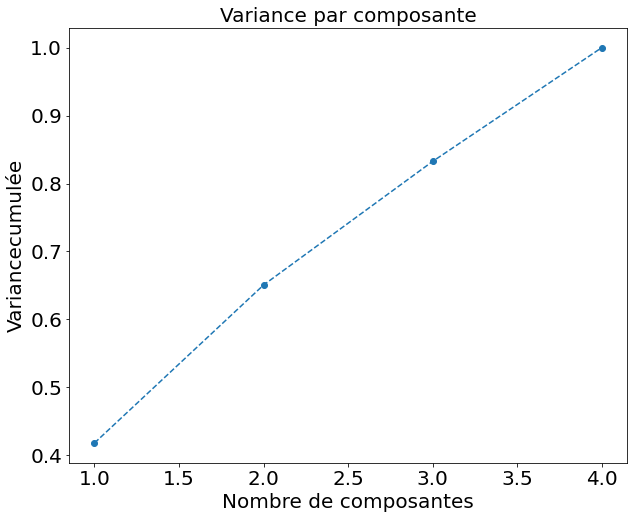

In [0]:
SIZE=20
cumValues = model_pca.explainedVariance.cumsum() # get the cumulative values
import matplotlib.pyplot as plt
# plot the graph 
plt.figure(figsize=(10,8))
plt.plot(range(1,5), cumValues, marker = 'o', linestyle='--')
plt.title('Variance par composante', size=20)
plt.xlabel('Nombre de composantes')
plt.ylabel('Variancecumulée')
plt.rc('axes', labelsize=SIZE) 
plt.rc('xtick', labelsize=SIZE)
plt.rc('ytick', labelsize=SIZE) 
plt.rc('legend', fontsize=SIZE)

In [0]:
df_features_image_pca = model_pca.transform(features_df)

In [0]:
df_features_image_pca.show()

+--------------------+--------------------+--------------------+--------------------+
 path| features| features_Vector| features_pca|
+--------------------+--------------------+--------------------+--------------------+
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|[0.0,0.0,0.0,0.0,...|[-56.669816033553...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|[0.0,0.0,0.0,0.0,...|[-49.342822030706...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|[0.0,0.0,0.0,0.0,...|[198.334527996748...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|[0.0,0.0,0.0,0.0,...|[23.5311021772672...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|[0.0,0.0,0.0,0.0,...|[-154.95977833106...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|[0.0,0.0,0.0,0.0,...|[-21.125981678184...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|[0.0,0.0,0.0,0.0,...|[185.519128995880...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|[0.0,0.0,0.0,0.0,...|[-121.20467468403...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|[0.0,0.0,0.0,0.0,...|[-135.44771245695...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|[0.0,0.0,0.0,0.0,...|[-54.310715493050...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|[0.0,0.0,0.0,0.0,...|[-99.399937983582...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|[0.0,0.0,0.0,0.0,...|[-22.917643425747...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|[0.0,0.0,0.0,0.0,...|[-162.41087103744...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|[0.0,0.0,0.0,0.0,...|[-17.666883833779...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|[0.0,0.0,0.0,0.0,...|[-56.759421377080...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|[0.0,0.0,0.0,0.0,...|[-58.512356748691...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|[0.0,0.0,0.0,0.0,...|[-11.004933991240...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|[0.0,0.0,0.0,0.0,...|[59.3583908468196...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|[0.0,0.0,0.0,0.0,...|[-142.96894968523...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|[0.0,0.0,0.0,0.0,...|[-51.211829810947...|
+--------------------+--------------------+--------------------+--------------------+
only showing top 20 rows

In [0]:
cols_to_drop = ['features', 'features_Vector'] 
final_df_features_image_pca = df_features_image_pca.drop(*cols_to_drop)
final_df_features_image_pca.show()

+--------------------+--------------------+
 path| features_pca|
+--------------------+--------------------+
dbfs:/mnt/db-ab98...|[113.144029857064...|
dbfs:/mnt/db-ab98...|[-87.894545875989...|
dbfs:/mnt/db-ab98...|[-32.612803532514...|
dbfs:/mnt/db-ab98...|[0.24982637775714...|
dbfs:/mnt/db-ab98...|[-58.763724078588...|
dbfs:/mnt/db-ab98...|[160.078294536968...|
dbfs:/mnt/db-ab98...|[-141.69182456556...|
dbfs:/mnt/db-ab98...|[-32.821681097255...|
dbfs:/mnt/db-ab98...|[-56.669816033553...|
dbfs:/mnt/db-ab98...|[-121.20467468403...|
dbfs:/mnt/db-ab98...|[200.801544617671...|
dbfs:/mnt/db-ab98...|[23.5311021772672...|
dbfs:/mnt/db-ab98...|[85.8411045395723...|
dbfs:/mnt/db-ab98...|[185.519128995880...|
dbfs:/mnt/db-ab98...|[-135.44771245695...|
dbfs:/mnt/db-ab98...|[-37.359735141202...|
dbfs:/mnt/db-ab98...|[63.8525819573438...|
dbfs:/mnt/db-ab98...|[-58.016954200138...|
dbfs:/mnt/db-ab98...|[-117.41393356407...|
dbfs:/mnt/db-ab98...|[-11.004933991240...|
+--------------------+--------------------+
only showing top 20 rows

In [0]:
#enregistrement des données réduite avec un PCA
PCA_path="/mnt/db-ab98764274fceb6cdf2ec80674550417-s3-root-bucket/ireland-prod/649518621194849/tmp/photos_features_PCA/"
final_df_features_image_pca.write.mode('overwrite').save(PCA_path)

In [0]:
#enregistrement des données réduite avec un PCA (format parquet)
print('Enregistrement distant S3')
path_parquet="/mnt/db-ab98764274fceb6cdf2ec80674550417-s3-root-bucket/ireland-prod/649518621194849/tmp/photos_features/"
write_dataframe_parquet(features_df, path_parquet)   

Enregistrement distant S3
L'Enregistrement a échoué.
Out[19]: True

In [0]:
#lecture des données réduites enregistrées (format parquet)
print('lecture distante S3')
df_parquet = spark.read.format('parquet').load(path_parquet) 
df_parquet.count()

lecture distante S3
Out[20]: 120

In [0]:
df_parquet.show()

+--------------------+--------------------+
 path| features|
+--------------------+--------------------+
dbfs:/mnt/db-ab98...|[1.3852957, 0.0, ...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[6.776924, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
dbfs:/mnt/db-ab98...|[0.0, 0.0, 0.0, 0...|
+--------------------+--------------------+
only showing top 20 rows

In [0]:
#lecture des données réduites enregistrées (format parquet)
print('lecture distante S3')
PCA_df_parquet = spark.read.load(PCA_path) 
PCA_df_parquet.count()

lecture distante S3
Out[22]: 120

In [0]:
PCA_df_parquet.show()

+--------------------+--------------------+
 path| features_pca|
+--------------------+--------------------+
dbfs:/mnt/db-ab98...|[113.144029857064...|
dbfs:/mnt/db-ab98...|[-87.894545875989...|
dbfs:/mnt/db-ab98...|[-32.612803532514...|
dbfs:/mnt/db-ab98...|[0.24982637775714...|
dbfs:/mnt/db-ab98...|[-58.763724078588...|
dbfs:/mnt/db-ab98...|[160.078294536968...|
dbfs:/mnt/db-ab98...|[-141.69182456556...|
dbfs:/mnt/db-ab98...|[-32.821681097255...|
dbfs:/mnt/db-ab98...|[-162.41087103744...|
dbfs:/mnt/db-ab98...|[-153.42448951160...|
dbfs:/mnt/db-ab98...|[198.334527996748...|
dbfs:/mnt/db-ab98...|[-108.83213247798...|
dbfs:/mnt/db-ab98...|[63.8525819573438...|
dbfs:/mnt/db-ab98...|[-58.016954200138...|
dbfs:/mnt/db-ab98...|[-117.41393356407...|
dbfs:/mnt/db-ab98...|[-11.004932008650...|
dbfs:/mnt/db-ab98...|[85.8411045395723...|
dbfs:/mnt/db-ab98...|[185.519128995880...|
dbfs:/mnt/db-ab98...|[-135.44771245695...|
dbfs:/mnt/db-ab98...|[-37.359734628920...|
+--------------------+--------------------+
only showing top 20 rows